# Tutorial 3b. Multilayer Perceptrons with Auto-differentiation!

- In this tutorial you will train (again) a multilayer perceptron

- But differently from what you did in `tutorial3a`, since this time, you will let the `PyTorch` library do most of the complicated work for you

- The goal of this notebook is to make you get familiar with `PyTorch` and the its main concepts, that we will use repeatedly along the course.

- We will be training a multilayer perceptron on the `CIFAR-10` dataset, a popular dataset of images that is used in Computer-Vision (CV) research

- You will need to use a lot the documentation of `PyTorch` and look at examples for this notebook.

In [3]:
import torch, torchvision
import numpy as np
import torch.nn as nn
from torchvision import datasets
import torchvision.transforms as transforms
from matplotlib import pyplot as plt 
import torch.nn.functional as F
import torchvision.models as models

## Load the dataset

- `PyTorch` provides popular computer vision datasets that can be easily downloaded
- The following code will download the `CIFAR-10` dataset for us  
- Since it is computationally expensive to load the entire dataset into memory, we will use `PyTorch`'s dataloaders  before feeding batches of images to the neural network

**QUESTION.** Fill in the next cell

In [4]:
import ssl 
ssl._create_default_https_context = ssl._create_unverified_context


transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = datasets.CIFAR10(root = "./data", train = True, download = True, transform = transform)
testset = datasets.CIFAR10(root = "./data", train = False, download = True, transform = transform)

batch_size = 64
num_workers = 2

# Fill in the options for both data loaders. Warning: the training dataloader should shuffle the data
trainloader = torch.utils.data.DataLoader(trainset, batch_size = batch_size, shuffle=True, num_workers = num_workers)
testloader = torch.utils.data.DataLoader(testset, batch_size = batch_size, shuffle=True, num_workers = num_workers)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


## Visualize the Images of CIFAR-10

* Once everything is properly loaded you should be able to visualize some of the samples of the CIFAR-10

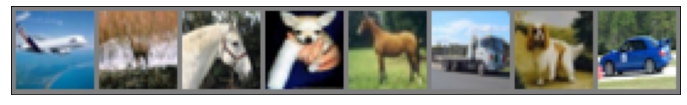

plane  deer horse   dog horse truck   dog   car


In [20]:
def show_images(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.figure(figsize=(12, 12))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.xticks(())
    plt.yticks(())
    plt.show()
    
dataiter = iter(trainloader)
images, labels = dataiter.next()
show_images(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


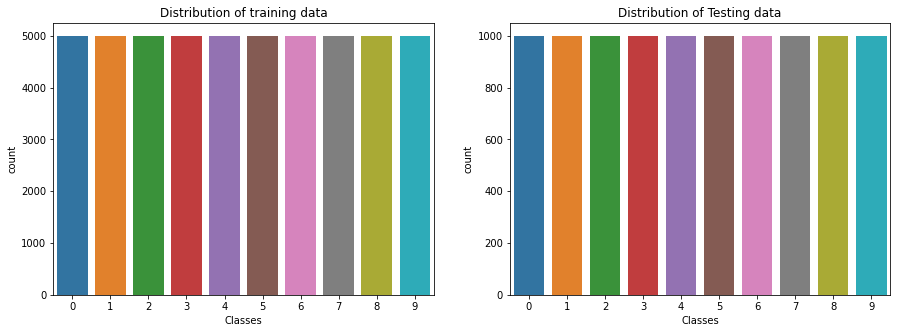

In [21]:
import seaborn as sns
fig, axs = plt.subplots(1,2,figsize=(15,5)) 
# Count plot for training set
sns.countplot(trainset.targets, ax=axs[0])
axs[0].set_title('Distribution of training data')
axs[0].set_xlabel('Classes')
# Count plot for testing set
sns.countplot(testset.targets, ax=axs[1])
axs[1].set_title('Distribution of Testing data')
axs[1].set_xlabel('Classes')
plt.show()

## Creating a MLP model and train it

- We are now ready to define all the necessary hyperparameters that are required to construct a proper MLP
- Similarly to what we did in `tutorial03a` we need to explore the data carefully in order to know how to set the following parameters

### Hyperparameters

**QUESTION.** Fill the hyperparameters

In [52]:
input_dim = 3*32*32
hidden_dim = 1
output_dim = 10
learning_rate = 0.0001
num_epochs = 5
device=torch.device('cuda:0')

### Computation Graph

- You are free to define any kind of architecture that you think is reasonable for the problem of classifying CIFAR-10 images
- By default, you can use a multi-layer perceptron
- The constructor of the neural network will represent the different components of the computation-graph, note that it is very similar to the way we have programmed our own neural network in `tutorial03a`.
- You will also have to define the forward pass yourself.

In [47]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net,self).__init__()  
        self.fc1 = torch.nn.Linear(32 * 32 * 3,128) 
        self.fc2 = torch.nn.Linear(128,96) 
        self.fc3 = torch.nn.Linear(96,32)   
        self.fc4 = torch.nn.Linear(32,10) 
     
    def forward(self,x):
        x = x.view(-1,32 * 32 * 3)    
        x = F.relu(self.fc1(x))  
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.softmax(self.fc4(x), dim=1) 
        return x

### Create the Network
- You are now ready to create your neural network object
- You will also have to define an appropriate loss function to minimize and an optimization algorithm
- By default, you can use the cross-entropy loss and the RMS prop optimizer

In [48]:
net = Net()
net.to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters())


### Train the Network

- Once you have your neural network you just need to train it. 
- You will have to compute the output of the forward pass, compare it to your desired output and update the parameters of the network by backpropagation. 
- Fortunately this time, this only requires less than 5 lines of code in `PyTorch`

In [49]:
def train(epoch):
    if __name__ == '__init__':
      try:
        main()
      except KeyboardInterrupt:
        print('Interrupted')
        sys.exit(0)
 
    for epoch in range(num_epochs):  # loop over the dataset multiple times    
      running_loss = 0.0
      for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.cuda()
        labels = labels.cuda()
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
        """
        if i % 2000==1999: 
            print("Epoch:{}, Iteration:{}, Loss:{:.3f}".format(epoch + 1, i + 1, running_loss / (i+1)))
        """
        if i % 20 == 19: 
            print("Epoch:{}, Iteration:{}, Loss:{:.3f}".format(epoch + 1, i + 1, running_loss / (i+1)))

In [63]:
train(num_epochs)

Epoch:1, Iteration:20, Loss:1.916
Epoch:1, Iteration:40, Loss:1.907
Epoch:1, Iteration:60, Loss:1.905
Epoch:1, Iteration:80, Loss:1.907
Epoch:1, Iteration:100, Loss:1.913
Epoch:1, Iteration:120, Loss:1.915
Epoch:1, Iteration:140, Loss:1.915
Epoch:1, Iteration:160, Loss:1.912
Epoch:1, Iteration:180, Loss:1.910
Epoch:1, Iteration:200, Loss:1.909
Epoch:1, Iteration:220, Loss:1.910
Epoch:1, Iteration:240, Loss:1.909
Epoch:1, Iteration:260, Loss:1.909
Epoch:1, Iteration:280, Loss:1.910
Epoch:1, Iteration:300, Loss:1.910
Epoch:1, Iteration:320, Loss:1.909
Epoch:1, Iteration:340, Loss:1.909
Epoch:1, Iteration:360, Loss:1.908
Epoch:1, Iteration:380, Loss:1.909
Epoch:1, Iteration:400, Loss:1.909
Epoch:1, Iteration:420, Loss:1.909
Epoch:1, Iteration:440, Loss:1.909
Epoch:1, Iteration:460, Loss:1.908
Epoch:1, Iteration:480, Loss:1.908
Epoch:1, Iteration:500, Loss:1.908
Epoch:1, Iteration:520, Loss:1.908
Epoch:1, Iteration:540, Loss:1.908
Epoch:1, Iteration:560, Loss:1.907
Epoch:1, Iteration:580, 

- Of course, repeated calls to `train` will continue training from where it were
- Training a neural network is a highly iterative process.

## Evaluate the final performance of the Network

- Once you think your network is properly trained, you will test its performance on the testing-set of the CIFAR-10 dataset
- Compute the final accuracy of your model
- You should be able to reach a 50% accuracy with a simple multi-layer perceptron

In [38]:
def test():
    
    correct = 0
    total = 0
    
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images = images.cuda()
            labels = labels.cuda()
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(" Accuracy of the test :{}".format(100 * correct / total))
    
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images = images.cuda()
            labels = labels.cuda()
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            for i in range(4):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1
    for i in range(10):
        print(" Accuracy of {} class is:{}".format(classes[i],100 * class_correct[i] / class_total[i]))
    

In [64]:
test()

 Accuracy of the test :49.24
 Accuracy of plane class is:52.30769230769231
 Accuracy of car class is:57.89473684210526
 Accuracy of bird class is:47.45762711864407
 Accuracy of cat class is:28.571428571428573
 Accuracy of deer class is:39.34426229508197
 Accuracy of dog class is:43.333333333333336
 Accuracy of frog class is:57.142857142857146
 Accuracy of horse class is:60.9375
 Accuracy of ship class is:70.6896551724138
 Accuracy of truck class is:54.6875


**Final remark.** Of course, this is far from being the state-of-the-art. Indeed, convolutional neural nets are the backbones for computer vision problems (we will do it in following labs), while we only used here a feed-forward network.

## Redo it using `pytorch-lightning`

There is some boilerplates in pure `PyTorch` code. The `pytorch-lighting` library is a new library allowing to simplify a lot the use of `PyTorch` together with very nice options for faster training and development.

**QUESTION**. Recode your neural network and its training using `pytorch-lightning`.

In [55]:
!pip install pytorch-lightning
import torch
from torch.nn import functional as F
from torch import nn
from pytorch_lightning.core.lightning import LightningModule
import pytorch_lightning as pl
import torchmetrics

In [56]:
class LightningNet(pl.LightningModule):  
    def __init__(self):
        super(LightningNet,self).__init__()  
        self.fc1 = torch.nn.Linear(32 * 32 * 3,64) 
        self.fc2 = torch.nn.Linear(64,64) 
        self.fc3 = torch.nn.Linear(64,32)   
        self.fc4 = torch.nn.Linear(32,10)
        self.train_acc = torchmetrics.Accuracy()
        self.valid_acc = torchmetrics.Accuracy()
         
    def forward(self,x):
        x = x.view(-1,32 * 32 * 3)  #verif  
        x = F.relu(self.fc1(x))  
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.softmax(self.fc4(x), dim=1) 
        return x
     
    def loss(self,logits,labels):
      return F.nll_loss(logits,labels)

    def configure_optimizers(self):
      optimizer = torch.optim.Adam(self.parameters(), lr=1e-3)
      return optimizer


    def training_step(self, train_batch, batch_idx):
      x, y = train_batch
      logits = self(x)
      loss = self.loss(logits, y)
      self.log('train_loss', loss, on_step=True, on_epoch=True, logger=True, prog_bar=True)
      self.train_acc(logits, y)
      self.log('train_acc', self.train_acc, on_step=True, on_epoch=False)
      return loss

    def test_step(self, batch, batch_idx):
      x, y = batch
      logits = self(x)
      loss = self.loss(logits, y)
      logits = torch.argmax(logits, dim=1)
      accuracy = torch.sum(y == logits).item() / (len(y) * 1.0)
      self.valid_acc(logits, y)
      self.log('valid_acc', self.valid_acc, on_step=True, on_epoch=True)
      output = dict({
        'test_loss': loss,
        'test_acc': torch.tensor(accuracy),
      })
      return output        
    

In [57]:
modelLightning = LightningNet()


In [60]:
trainer = pl.Trainer(max_epochs = 10, auto_select_gpus=True)
#train
trainer.fit(modelLightning, trainloader)
#test
trainer.test(modelLightning, testloader)

GPU available: True, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:1585: UserWarning: GPU available but not used. Set the gpus flag in your trainer `Trainer(gpus=1)` or script `--gpus=1`.
  "GPU available but not used. Set the gpus flag in your trainer `Trainer(gpus=1)` or script `--gpus=1`."

  | Name      | Type     | Params
---------------------------------------
0 | fc1       | Linear   | 196 K 
1 | fc2       | Linear   | 4.2 K 
2 | fc3       | Linear   | 2.1 K 
3 | fc4       | Linear   | 330   
4 | train_acc | Accuracy | 0     
5 | valid_acc | Accuracy | 0     
---------------------------------------
203 K     Trainable params
0         Non-trainable params
203 K     Total params
0.813     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/data_loading.py:662: UserWarning: Your `test_dataloader` has `shuffle=True`, it is strongly recommended that you turn this off for val/test/predict dataloaders.
  category=UserWarning,


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'valid_acc': 0.44620001316070557, 'valid_acc_epoch': 0.44620001316070557}
--------------------------------------------------------------------------------


[{'valid_acc': 0.44620001316070557, 'valid_acc_epoch': 0.44620001316070557}]